<a href="https://colab.research.google.com/github/mohdrab01/Machine-Learning-Lab-Tasks/blob/main/ML_Week5(ii_c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML - Week 5(ii-c) - 03-05-2021
# 18071A0591

---




---


## II. Exemplify KNN (c) Fruits Dataset


---

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/syash5/fruit-prediction-using-knn/master/fruit_data_with_colors.txt

--2021-05-03 09:28:49--  https://raw.githubusercontent.com/syash5/fruit-prediction-using-knn/master/fruit_data_with_colors.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2368 (2.3K) [text/plain]
Saving to: ‘fruit_data_with_colors.txt’

fruit_data_with_col 100%[===================>]   2.31K  --.-KB/s    in 0s      

2021-05-03 09:28:49 (44.9 MB/s) - ‘fruit_data_with_colors.txt’ saved [2368/2368]



In [ ]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [ ]:
type(fruits)

pandas.core.frame.DataFrame

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
fruits.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [ ]:
fruits.shape

(59, 7)

In [ ]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [ ]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [ ]:
x = fruits[['mass', 'width','height','color_score']]
y = fruits['fruit_label']

In [ ]:
import seaborn as sns

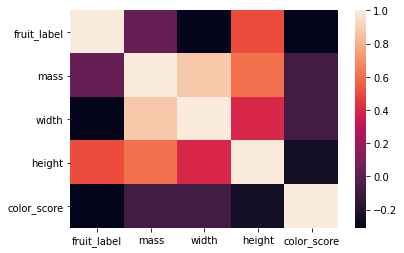

In [ ]:
sns.heatmap(fruits.corr())

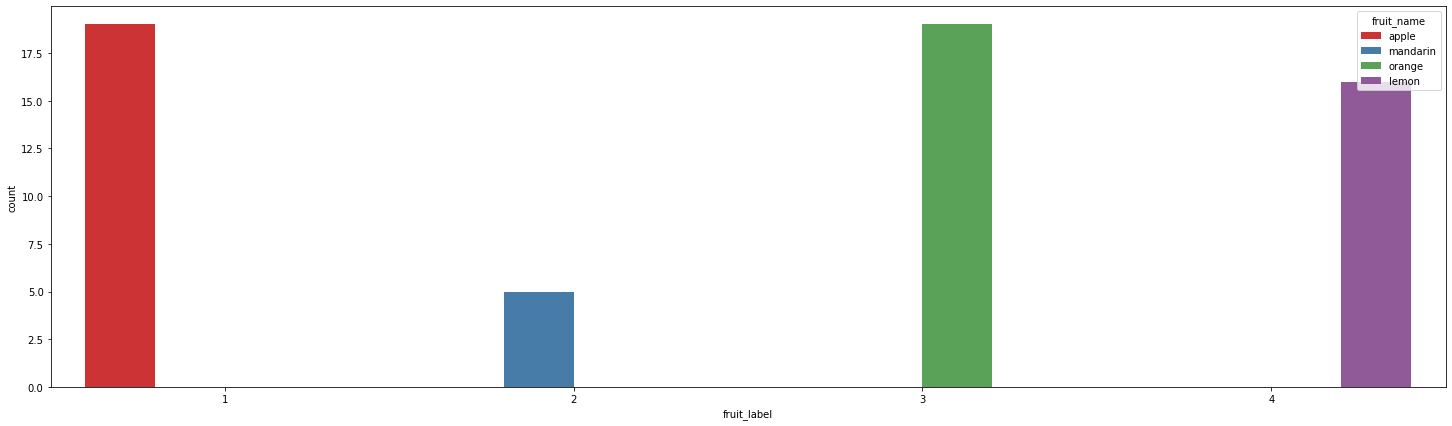

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='fruit_label',hue="fruit_name",data=fruits,palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(47, 4)
(12, 4)
(47,)
(12,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# With particularly K = 4, KNN Classifer and Score is as:
clf_knn = KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred=clf_knn.predict(x_test)
print(y_pred)
score = metrics.accuracy_score(y_test,y_pred)
print("\n\nKNN Classifier Score:",score)

[2 1 4 3 3 3 3 1 2 4 2 3]


KNN Classifier Score: 0.8333333333333334


In [ ]:
k_range = range(1,26)

In [ ]:
scores = {}
scores_list = []
for k in k_range:
        clf_knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
        clf_knn.fit(x_train,y_train)
        y_pred=clf_knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

scores

{1: 0.5833333333333334,
 2: 0.5,
 3: 0.5833333333333334,
 4: 0.8333333333333334,
 5: 0.5,
 6: 0.5,
 7: 0.4166666666666667,
 8: 0.5833333333333334,
 9: 0.5,
 10: 0.5,
 11: 0.5,
 12: 0.5,
 13: 0.4166666666666667,
 14: 0.5,
 15: 0.3333333333333333,
 16: 0.3333333333333333,
 17: 0.4166666666666667,
 18: 0.3333333333333333,
 19: 0.3333333333333333,
 20: 0.3333333333333333,
 21: 0.3333333333333333,
 22: 0.3333333333333333,
 23: 0.3333333333333333,
 24: 0.3333333333333333,
 25: 0.25}

In [ ]:
scores = {}
scores_list = []
for k in k_range:
        clf_knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
        clf_knn.fit(x_train,y_train)
        y_pred=clf_knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

scores


{1: 0.5833333333333334,
 2: 0.5833333333333334,
 3: 0.6666666666666666,
 4: 0.8333333333333334,
 5: 0.5,
 6: 0.5,
 7: 0.4166666666666667,
 8: 0.5833333333333334,
 9: 0.5,
 10: 0.5,
 11: 0.5,
 12: 0.5,
 13: 0.4166666666666667,
 14: 0.5,
 15: 0.3333333333333333,
 16: 0.3333333333333333,
 17: 0.4166666666666667,
 18: 0.3333333333333333,
 19: 0.3333333333333333,
 20: 0.3333333333333333,
 21: 0.3333333333333333,
 22: 0.3333333333333333,
 23: 0.3333333333333333,
 24: 0.3333333333333333,
 25: 0.25}

In [ ]:
scores = {}
scores_list = []
for k in k_range:
        clf_knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        clf_knn.fit(x_train,y_train)
        y_pred=clf_knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

scores

{1: 0.5833333333333334,
 2: 0.5,
 3: 0.5833333333333334,
 4: 0.8333333333333334,
 5: 0.5,
 6: 0.5,
 7: 0.4166666666666667,
 8: 0.5833333333333334,
 9: 0.5,
 10: 0.5,
 11: 0.5,
 12: 0.5,
 13: 0.4166666666666667,
 14: 0.5,
 15: 0.3333333333333333,
 16: 0.3333333333333333,
 17: 0.4166666666666667,
 18: 0.3333333333333333,
 19: 0.3333333333333333,
 20: 0.3333333333333333,
 21: 0.3333333333333333,
 22: 0.3333333333333333,
 23: 0.3333333333333333,
 24: 0.3333333333333333,
 25: 0.25}

Text(0, 0.5, 'Testing Accuracy')

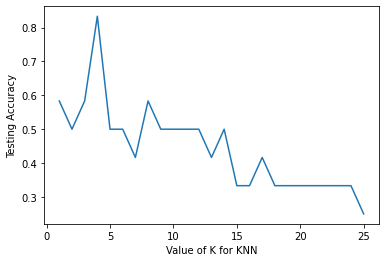

In [ ]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')